## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1026]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import requests
warnings.filterwarnings('ignore')
import plotly.express as px
import pickle
from sklearn.preprocessing import StandardScaler

# Cleaning

## Zillow Home Value Index (ZHVI) - 1

https://www.zillow.com/research/data/

Zillow Home Value Index (ZHVI): A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range.

The dataset includes monthly home values from 1/31/18 - 2/28/23.

In [400]:
# Your code here - remember to use markdown cells for comments as well!

housing_avg_sales = pd.read_csv("data/monthly_housing_sales.csv")

In [401]:
housing_avg_sales.describe()

,RegionID,SizeRank,RegionName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,...,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23
count,27016.000000,27016.000000,27016.000000,1.293000e+04,1.299600e+04,1.301000e+04,1.302900e+04,1.309200e+04,1.310300e+04,1.311900e+04,...,2.638700e+04,2.638700e+04,2.638600e+04,2.638600e+04,2.638700e+04,2.638700e+04,2.638500e+04,2.638500e+04,2.635800e+04,2.699500e+04
mean,80538.092538,13982.384143,48482.893582,1.373628e+05,1.374487e+05,1.377633e+05,1.385579e+05,1.394409e+05,1.404256e+05,1.415246e+05,...,3.104285e+05,3.138740e+05,3.152925e+05,3.148799e+05,3.130302e+05,3.115263e+05,3.104764e+05,3.094113e+05,3.090568e+05,3.056303e+05
std,28066.982354,8433.152613,27290.928943,9.760333e+04,9.790899e+04,9.842051e+04,9.956390e+04,1.007600e+05,1.022088e+05,1.037290e+05,...,2.997591e+05,3.025514e+05,3.028717e+05,3.008750e+05,2.974656e+05,2.947537e+05,2.932503e+05,2.920725e+05,2.899878e+05,2.858136e+05
min,58196.000000,0.000000,1001.000000,2.384576e+03,2.381859e+03,2.376159e+03,2.371337e+03,2.363892e+03,2.355828e+03,2.359742e+03,...,1.541060e+04,1.464299e+04,1.438204e+04,1.430730e+04,1.444859e+04,1.416063e+04,1.363281e+04,1.290636e+04,1.303451e+04,1.350889e+04
25%,68927.750000,6760.750000,26168.500000,7.367663e+04,7.371517e+04,7.385268e+04,7.404427e+04,7.442679e+04,7.461939e+04,7.507184e+04,...,1.454273e+05,1.469859e+05,1.479162e+05,1.482162e+05,1.477473e+05,1.473970e+05,1.469848e+05,1.465450e+05,1.471855e+05,1.460231e+05
50%,78972.000000,13597.000000,48050.500000,1.157160e+05,1.156878e+05,1.159414e+05,1.164103e+05,1.168338e+05,1.172417e+05,1.177493e+05,...,2.302602e+05,2.331476e+05,2.344141e+05,2.346047e+05,2.338440e+05,2.333340e+05,2.330190e+05,2.327526e+05,2.332217e+05,2.314695e+05
75%,88603.500000,20807.000000,70126.250000,1.724758e+05,1.726354e+05,1.728072e+05,1.738038e+05,1.746851e+05,1.759434e+05,1.774230e+05,...,3.732285e+05,3.775625e+05,3.795277e+05,3.798175e+05,3.778337e+05,3.759049e+05,3.748862e+05,3.738877e+05,3.729521e+05,3.696257e+05
max,808739.000000,30657.000000,99929.000000,1.833082e+06,1.847909e+06,1.869682e+06,1.915909e+06,1.973111e+06,2.039785e+06,2.107651e+06,...,7.999163e+06,8.022565e+06,7.974348e+06,7.856402e+06,7.720118e+06,7.628646e+06,7.577200e+06,7.526595e+06,7.459706e+06,7.397089e+06


In [968]:
housing_avg_sales.head()

,RegionName,City,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,...,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23
222,98052,Redmond,314392.4317,315516.3438,316845.9788,319353.2150,322133.5486,324341.7990,326978.1104,329053.5713,...,1.349486e+06,1.347791e+06,1.325180e+06,1.291359e+06,1.257709e+06,1.236358e+06,1.224996e+06,1.217446e+06,1.207867e+06,1.196487e+06
687,98115,Seattle,318558.3568,319616.7570,320843.0957,323204.4337,325924.3026,328381.6973,331065.1124,333353.8811,...,1.066593e+06,1.067383e+06,1.056836e+06,1.039953e+06,1.023326e+06,1.013443e+06,1.009175e+06,1.006457e+06,1.003210e+06,9.994575e+05
750,98103,Seattle,280310.2049,281824.1082,283329.6054,286221.6877,289369.9785,292266.6496,295348.6334,297934.2028,...,9.776691e+05,9.782177e+05,9.679867e+05,9.507044e+05,9.324177e+05,9.191123e+05,9.115535e+05,9.064256e+05,9.025249e+05,8.994683e+05
927,98042,Covington,238999.0299,239929.1029,240821.6804,242420.6533,244244.1657,245833.2429,247790.3678,249147.5348,...,6.721901e+05,6.735792e+05,6.692471e+05,6.620056e+05,6.547287e+05,6.496724e+05,6.462397e+05,6.429213e+05,6.394547e+05,6.368745e+05
944,98023,Federal Way,211483.3826,212330.9375,213092.5046,214490.2135,216123.4860,217567.8989,219341.4238,220507.0655,...,5.930923e+05,5.935284e+05,5.897206e+05,5.837300e+05,5.780341e+05,5.747959e+05,5.729619e+05,5.712011e+05,5.689185e+05,5.667779e+05


In [403]:
housing_avg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27016 entries, 0 to 27015
Columns: 287 entries, RegionID to 2/28/23
dtypes: float64(278), int64(3), object(6)
memory usage: 59.2+ MB


In [404]:
# checking for nulls
housing_avg_sales.isna().sum()

#dropping
housing_avg_sales.dropna()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/00,...,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,92655.34904,...,181360.81950,183535.39020,185482.63530,187018.19290,188056.30000,188798.11070,189557.62420,190082.49430,191041.1120,192184.53040
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,72948.67394,...,325553.20890,326102.85670,326366.81360,325633.36330,323904.89960,322045.05140,321395.14560,320127.89330,320087.4720,320670.13580
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,234929.45220,...,741858.19440,749606.64770,754899.58650,756155.90590,753092.87960,750451.45820,748582.92050,745102.93810,741891.9911,737817.61690
5,95992,5,90011,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,119839.31400,...,560633.01620,563321.93030,568092.29580,571707.40480,574981.93480,575326.92980,575938.91920,574879.43130,571582.6529,564069.05970
6,84630,6,60629,zip,IL,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,84910.70582,...,225212.50580,225783.81830,224845.01580,223177.27590,220647.37890,218422.81240,216926.54720,215962.55100,216813.2285,218026.90180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26991,90369,30657,74358,zip,OK,OK,North Miami,"Miami, OK",Ottawa County,22589.36978,...,52742.50505,53529.98397,54738.76521,55463.03103,56045.50932,56209.49241,56363.10555,56290.55056,55295.3861,54551.23299
26993,63527,30657,14441,zip,NY,NY,Dresden,"Rochester, NY",Yates County,93978.40904,...,189488.43350,190512.09950,190535.60610,190335.76480,189830.91310,189807.41950,190069.46370,190146.54500,189197.5860,188034.61510
26998,72882,30657,33877,zip,FL,FL,Winter Haven,"Lakeland-Winter Haven, FL",Polk County,34278.42887,...,113322.21860,115648.40820,117353.80040,118278.89520,119501.93820,120311.58750,120919.66140,120731.48130,119495.4648,119405.00700
26999,73063,30657,34250,zip,FL,FL,Terra Ceia,"North Port-Sarasota-Bradenton, FL",Manatee County,223895.68740,...,780235.69330,802836.31140,813983.52220,815578.98940,811046.08130,805077.28030,799674.54070,793656.24610,789209.2945,787781.72390


In [405]:
# updating DataFrame to only include King County data

housing_avg_sales = housing_avg_sales[housing_avg_sales['CountyName'].str.contains("King County")]

In [406]:
# dropping columns
housing_avg_sales.drop(columns=['StateName','State','SizeRank','RegionID','RegionType','Metro','CountyName' ], inplace=True)

In [407]:
# checking for nulls
housing_avg_sales.isna().sum()

RegionName    0
City          1
1/31/00       6
2/29/00       6
3/31/00       6
             ..
10/31/22      0
11/30/22      0
12/31/22      0
1/31/23       0
2/28/23       0
Length: 280, dtype: int64

In [408]:
#dropping nulls
housing_avg_sales.dropna(inplace=True)

In [409]:
#making a new dataframe with averave monthly sales for the county
mean_values = pd.DataFrame(housing_avg_sales.describe().mean())

In [410]:
# resetting index and making it a new column/renaming column
mean_values = mean_values.reset_index()

mean_values = mean_values.iloc[1:]

mean_values = pd.DataFrame(mean_values.rename(columns = {'index':'date', 0:'avg_sale_price'},))

In [411]:
#sanity check
mean_values 

,date,avg_sale_price
1,1/31/00,2.999840e+05
2,2/29/00,3.010927e+05
3,3/31/00,3.025817e+05
4,4/30/00,3.054249e+05
5,5/31/00,3.091108e+05
...,...,...
274,10/31/22,1.096713e+06
275,11/30/22,1.086627e+06
276,12/31/22,1.079276e+06
277,1/31/23,1.071864e+06


In [412]:
#checking datatypes
mean_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 1 to 278
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            278 non-null    object 
 1   avg_sale_price  278 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [413]:
#changing date datatype of date to datetime
mean_values["date"] = pd.to_datetime(mean_values["date"])

In [414]:
#sanity check
mean_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 1 to 278
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            278 non-null    datetime64[ns]
 1   avg_sale_price  278 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.5 KB


## Economic Research - Monthly Mortgage Rates - 2

This dataset was pulled from "Economic Research - Federal Reserve Bank of St. Louis". In includes monthly mortage rates from the past 30 years.

https://fred.stlouisfed.org/series/MORTGAGE30US

In [339]:
#converting data to dataframe

mortgage_rates = pd.read_csv("data/MORTGAGE30US.csv")

In [2266]:
#checking info

mortgage_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          279 non-null    object 
 1   mortgage_rate  279 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [341]:
#checking nulls

mortgage_rates.isna().sum()

DATE            0
MORTGAGE30US    0
dtype: int64

In [342]:
#sanity check
mortgage_rates.head()

,DATE,MORTGAGE30US
0,1/1/00,8.2100
1,2/1/00,8.3250
2,3/1/00,8.2400
3,4/1/00,8.1525
4,5/1/00,8.5150


In [343]:
#changing the datatype of date to datetime
mortgage_rates["DATE"]= pd.to_datetime(mortgage_rates["DATE"])

#changing the column titles
mortgage_rates.rename(columns = {'DATE':'month', 'MORTGAGE30US': 'mortgage_rate'}, inplace = True)

In [345]:
#sanity check
mortgage_rates

,month,mortgage_rate
0,2000-01-01,8.2100
1,2000-02-01,8.3250
2,2000-03-01,8.2400
3,2000-04-01,8.1525
4,2000-05-01,8.5150
...,...,...
274,2022-11-01,6.8050
275,2022-12-01,6.3640
276,2023-01-01,6.2725
277,2023-02-01,6.2575


In [991]:
#changing date to month and year
mortgage_rates['month'] = mortgage_rates['month'].dt.strftime('%B %Y')

In [992]:
mortgage_rates.head()

,month,mortgage_rate
0,January 2000,8.2100
1,February 2000,8.3250
2,March 2000,8.2400
3,April 2000,8.1525
4,May 2000,8.5150


In [994]:
mortgage_rates.to_csv('monthy_mortgage_rates_cleaned.csv')

### Jonining Home Value and Mortgage Rate Dataframes - by month

In [415]:
# Left join the two dataframes based on the month column
mortgage_sales = pd.concat([mortgage_rates, mean_values],axis=1, join='inner')

#dropping date column
mortgage_sales.drop(columns=['date'], inplace=True)

## Cleaned Kings County Dataset - from Clara - 3
Importing and cleaning dataset from Clara - original file name was .steph 

In [2269]:
# importing cleaned dataset from clara
cleaned = pd.read_csv("data/final_cleaned_kc_data.csv")

In [2270]:
#splitting columns

cleaned = pd.concat([cleaned, cleaned['address'].str.split(',', expand=True)], axis=1)
cleaned.rename(columns={0:'street_name',1:'city',2:'state_zip'}, inplace=True)
cleaned = pd.concat([cleaned, cleaned['state_zip'].str.split(' ', expand=True)], axis=1,)
cleaned.rename(columns={1:'state', 2: 'zip_code'}, inplace=True)
cleaned.drop(columns=['address', 'state_zip', 3, 4, 5, 0], inplace=True)

#dropping columns
cleaned.drop(columns=["Unnamed: 0", "id"], inplace=True)

# stripping space from city
cleaned['city'] = cleaned['city'].str.strip()

#rounding floats to 4
cleaned = round(cleaned, 4)

In [2271]:
#exporting final cleaned csv

cleaned.to_csv("steph_cleaned_housing_data.csv")

### Adding the monthly interest rate column from Zillow to the dataframe to add in additional variable
To do this, I changed the date columns to only include months/years so I could
add in the mortgage rate based on the month the home was sold

In [2273]:
#changing date variable to datetime
cleaned['date'] = pd.to_datetime(cleaned['date'])

#changing date to month and year
cleaned['date'] = cleaned['date'].dt.strftime('%B %Y')

#changing date to month and year
mortgage_sales['month'] = mortgage_sales['month'].dt.strftime('%B %Y')

# add mortgage_rate column from mortgage df to cleaned df based on the condition if date=month
cleaned_2['mortgage_rate_3'] = cleaned_2.apply(lambda x: mortgage_sales.loc[mortgage_sales['month'] == x['date'], 'mortgage_rate'].values[0] if mortgage_sales['month'].isin([x['date']]).any() else None, axis=1)

AttributeError: Can only use .dt accessor with datetimelike values

## Walkscore.com API - 5

## Merging walkscore

In [1294]:
#importing sheet
walkscore_mortgage = pd.readdd_csv("Data/9800_merged_walk_score_mortgage_0330.csv")

In [1295]:
walkscore_mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9800 non-null   int64  
 1   walkscore        9793 non-null   float64
 2   walktype         9793 non-null   object 
 3   lat              9800 non-null   float64
 4   long             9800 non-null   float64
 5   biketype         9719 non-null   object 
 6   bikescore        9719 non-null   float64
 7   date             9800 non-null   object 
 8   price            9800 non-null   float64
 9   bedrooms         9800 non-null   int64  
 10  bathrooms        9800 non-null   float64
 11  sqft_living      9800 non-null   int64  
 12  sqft_lot         9800 non-null   int64  
 13  floors           9800 non-null   float64
 14  waterfront       9800 non-null   object 
 15  greenbelt        9800 non-null   object 
 16  nuisance         9800 non-null   object 
 17  view          

In [1296]:
#for loop to change multiple column type

for col in ['walktype','zip_code','condition','grade','nuisance','view']:
    walkscore_mortgage[col] = walkscore_mortgage[col].astype('str')

In [1297]:
walkscore_mortgage['view']

0       NONE
1       NONE
2       NONE
3       GOOD
4       NONE
        ... 
9795    NONE
9796    NONE
9797    NONE
9798    NONE
9799    NONE
Name: view, Length: 9800, dtype: object

In [1298]:
#dropping unnaned column
walkscore_mortgage.drop(columns = "Unnamed: 0", inplace = True)

#renanming column
walkscore_mortgage.rename(columns={'mortgage_rate_3':'mortgage_rate'}, inplace = True)

#droppping extra lat and lon columns
walkscore_mortgage.drop(columns=["lat_1", "long_1"], inplace = True)

#locating only Washington addresses
walkscore_mortgage = walkscore_mortgage.loc[walkscore_mortgage['state'] == "Washington"]

#changing date datatype of date to datetime
walkscore_mortgage["date"] = pd.to_datetime(walkscore_mortgage["date"])

In [1301]:
walkscore_mortgage.head()

,walkscore,walktype,lat,long,biketype,bikescore,date,price,bedrooms,bathrooms,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,street_name,city,state,zip_code,mortgage_rate
0,11.0,Car-Dependent,47.7315,-122.2215,Somewhat Bikeable,15.0,2021-06-01,961000.0,3,2.5,...,1170,400,80,1979,0,8832 Northeast 144th Street,Kirkland,Washington,98034,2.975
1,34.0,Car-Dependent,47.3355,-122.2140,Very Bikeable,70.0,2021-09-01,185000.0,4,2.5,...,0,430,30,2006,0,1321 32nd Street Northeast,Auburn,Washington,98002,2.900
2,47.0,Car-Dependent,47.4990,-122.1540,Somewhat Bikeable,49.0,2021-09-01,1010000.0,7,4.5,...,0,790,160,1965,0,956 Field Avenue Northeast,Renton,Washington,98059,2.900
3,77.0,Very Walkable,47.6745,-122.3580,Very Bikeable,78.0,2021-06-01,1880000.0,6,3.0,...,860,0,300,1920,0,6233 1st Avenue Northwest,Seattle,Washington,98107,2.975
4,11.0,Car-Dependent,47.7465,-122.0745,Somewhat Bikeable,12.0,2021-07-01,1000000.0,4,2.5,...,1290,530,140,1979,0,19705 Northeast 164th Street,Woodinville,Washington,98077,2.868


# Analyzing

In [963]:
cleaned = cleaned.round(decimals=3)

In [2272]:
cleaned

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,street_name,city,state,zip_code
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,40,1969,0,47.4620,-122.1905,2102 Southeast 21st Court,Renton,Washington,98055
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,47.7115,-122.3559,11231 Greenwood Avenue North,Seattle,Washington,98133
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,0,1956,0,47.5020,-122.2252,8504 South 113th Street,Seattle,Washington,98178
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,200,270,2010,0,47.5661,-122.2902,4079 Letitia Avenue South,Seattle,Washington,98118
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,30,2012,0,47.5325,-122.0719,2193 Northwest Talus Drive,Issaquah,Washington,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30106,2021-11-30,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,0,210,1921,0,47.6647,-122.3294,4673 Eastern Avenue North,Seattle,Washington,98103
30107,2021-06-16,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,0,520,2011,0,47.5656,-122.3885,4131 44th Avenue Southwest,Seattle,Washington,98116
30108,2022-05-27,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,240,110,1995,0,47.6104,-122.2958,910 Martin Luther King Jr Way,Seattle,Washington,98122
30109,2022-02-24,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,480,100,2006,0,47.4495,-122.1891,17127 114th Avenue Southeast,Renton,Washington,98055


In [964]:
cleaned.to_csv("cleaned_clara_data_w_interest.csv")

In [773]:
price_scores = pd.merge(cleaned_reindex, top_500_walk, left_index=True, right_index=True)

In [774]:
price_scores.drop(columns=["index","snapped_lat", "snapped_lon"], inplace=True)

In [862]:
#changing date variable to datetime
price_scores['date'] = pd.to_datetime(price_scores['date'])

#changing date to month and year
price_scores['date'] = price_scores['date'].dt.strftime('%B %Y')

In [863]:
#add mortgage_rate column from mortgage df to prices_scores based on the condition if date=month
price_scores['mortgage_rate_3'] = price_scores.apply(lambda x: mortgage_sales.loc[mortgage_sales['month'] == x['date'], 'mortgage_rate'].values[0] if mortgage_sales['month'].isin([x['date']]).any() else None, axis=1)

In [879]:
price_scores.dropna(inplace=True)

In [865]:
# creating walk and bikescore dataframe
walk_bike_df = price_scores[["walkscore", "bike_score", "price", "city"]]

In [869]:
#dropping nulls
walk_bike_df.dropna(inplace=True)

In [870]:
walk_bike_df.isna().sum()

walkscore     0
bike_score    0
price         0
city          0
dtype: int64

In [914]:
##linear regression for top 5000 values with walk, bike score, and mortgage rates

x_bike = price_scores.select_dtypes(include=['float','int'])
x_bike = x_bike.drop(columns='price')

x_bike = sm.add_constant(x)
y_bike = price_scores['price']

model = sm.OLS(y_home, x_home).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1577.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:06:56   Log-Likelihood:            -4.4715e+05
No. Observations:               30111   AIC:                         8.943e+05
Df Residuals:                   30096   BIC:                         8.945e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.964e+06   4.05e+05     14.726      0.000    5.17e+06    6.76e+06
bedrooms        -1.662e+05   5427.986    -30.616      0.000   -1.77e+05   -1.56e+05
bathrooms        1.414e+05   8002.169     17.676      0.000    1.26e+05    1.57e+05
sqft_living       333.5084     18.166     18.359      0.000     297.902     369.115
sqft_lot           -0.0828      0.067     -1.231      0.218      -0.215       0.049
floors          -8113.4227   9797.480     -0.828      0.408   -2.73e+04    1.11e+04
sqft_above        290.0587     18.540     15.645      0.000     253.720     326.398
sqft_basement     164.0144     13.603     12.058      0.000     137.353     190.676
sqft_garage      -149.5667     18.972     -7.884      0.000    -186.753    -112.381
sqft_patio        265.4909     17.821     14.898      0.000     230.562     300.420
yr_built        -3189.6634    185.832    -17.164      0.000   -3553.902   -2825.425
yr_renovated       51.3911      9.958      5.161      0.000      31.873      70.909
lat              3.089e+04   4255.423      7.260      0.000    2.26e+04    3.92e+04
long             1.177e+04   1069.712     11.002      0.000    9672.506    1.39e+04
mortgage_rate_3  9.676e+04   4647.632     20.820      0.000    8.77e+04    1.06e+05
==============================================================================
Omnibus:                    43575.706   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51440383.042
Skew:                           8.237   Prob(JB):                         0.00
Kurtosis:                     204.815   Cond. No.                     6.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [871]:
seattle = walk_bike_df[walk_bike_df['city'] == 'Seattle']

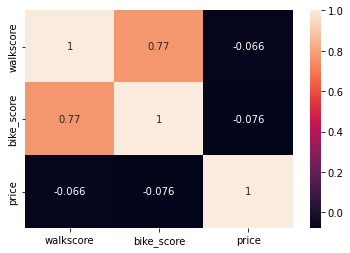

In [885]:
#heatmap of home value and mortgage correlation
sns.heatmap(walk_bike_df.corr(), annot=True);

In [831]:
# creating new dataframe to add in monthly mortgage rates
cleaned_2 = cleaned

#changing date variable to datetime
cleaned_2['date'] = pd.to_datetime(cleaned_2['date'])

#changing date to month and year
cleaned_2['date'] = cleaned_2['date'].dt.strftime('%B %Y')

#changing date to month and year
mortgage_sales['month'] = mortgage_sales['month'].dt.strftime('%B %Y')

# add mortgage_rate column from mortgage df to cleaned df based on the condition if date=month
cleaned_2['mortgage_rate_3'] = cleaned_2.apply(lambda x: mortgage_sales.loc[mortgage_sales['month'] == x['date'], 'mortgage_rate'].values[0] if mortgage_sales['month'].isin([x['date']]).any() else None, axis=1)

In [908]:
#checking correlatino

house_corrs = wa_only_df.corr()['price'].map(abs).sort_values(ascending=False)
house_corrs

price              1.000000
sqft_living        0.608616
sqft_above         0.538631
bathrooms          0.480337
sqft_patio         0.313789
bedrooms           0.288954
sqft_garage        0.263674
sqft_basement      0.245005
floors             0.180589
yr_built           0.095796
sqft_lot           0.086550
yr_renovated       0.085023
mortgage_rate_3    0.082943
lat                0.063430
long               0.022278
Name: price, dtype: float64

In [947]:
# dropping nulls

cleaned_2.dropna(inplace=True)

In [1243]:
cleaned_2['price'].sort_values(ascending=False).head(30)

23434    30750000.0
3752     23500000.0
25522    22750000.0
27134    20000000.0
18072    17800000.0
9499     15740000.0
10586    15000001.0
8041     14850000.0
22672    14500000.0
5802     13950000.0
12796    13850000.0
8640     13425000.0
6097     13300000.0
16646    12932174.0
6925     12901148.0
22570    12750000.0
12691    12125000.0
20465    11625000.0
11443    11400000.0
24225    11300000.0
21806    10750000.0
22685    10500000.0
18600    10500000.0
26577    10300000.0
20798    10030000.0
9357     10000000.0
8537      9842400.0
22259     9800000.0
5527      9800000.0
9417      9700000.0
Name: price, dtype: float64

In [1245]:
cleaned_var = cleaned_2.loc[cleaned['price'] < 10000000 ]

In [949]:
##linear regression for top 5000 values with walk, bike score, and mortgage rates

x_bike = cleaned_2.select_dtypes(include=['float','int'])
x_bike = x_bike.drop(columns='price')

x = x_bike
y = cleaned_2['price']

model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1575.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:52:58   Log-Likelihood:            -4.4665e+05
No. Observations:               30076   AIC:                         8.933e+05
Df Residuals:                   30061   BIC:                         8.934e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.931e+06   4.07e+05     14.574      0.000    5.13e+06    6.73e+06
bedrooms        -1.662e+05   5432.549    -30.595      0.000   -1.77e+05   -1.56e+05
bathrooms        1.413e+05   8008.446     17.642      0.000    1.26e+05    1.57e+05
sqft_living       333.8966     18.178     18.369      0.000     298.268     369.526
sqft_lot           -0.0825      0.067     -1.226      0.220      -0.214       0.049
floors          -8147.6582   9813.768     -0.830      0.406   -2.74e+04    1.11e+04
sqft_above        289.8832     18.552     15.626      0.000     253.521     326.245
sqft_basement     163.7552     13.612     12.030      0.000     137.075     190.435
sqft_garage      -149.5507     18.990     -7.875      0.000    -186.772    -112.329
sqft_patio        265.2648     17.835     14.873      0.000     230.307     300.223
yr_built        -3191.5963    186.023    -17.157      0.000   -3556.210   -2826.983
yr_renovated       51.3887      9.963      5.158      0.000      31.861      70.916
lat              3.245e+04   4367.036      7.432      0.000    2.39e+04     4.1e+04
long             1.207e+04   1090.950     11.063      0.000    9930.519    1.42e+04
mortgage_rate_3  9.676e+04   4650.743     20.806      0.000    8.76e+04    1.06e+05
==============================================================================
Omnibus:                    43518.007   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51301145.395
Skew:                           8.234   Prob(JB):                         0.00
Kurtosis:                     204.658   Cond. No.                     6.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1248]:
##linear regression for top 5000 values with walk, bike score, and mortgage rates

x_bike = cleaned_var.select_dtypes(include=['float','int'])
x_bike = x_bike.drop(columns='price')

x = x_bike
y = cleaned_var['price']

from sklearn.preprocessing import StandardScaler

#standard_scaler
scaler = StandardScaler()

#fit it
scaler.fit(x_bike)

#transform it
x_scaled = scaler.transform(x_bike)

model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     1800.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:02:03   Log-Likelihood:            -4.4170e+05
No. Observations:               30050   AIC:                         8.834e+05
Df Residuals:                   30035   BIC:                         8.836e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.663e+06    3.5e+05     16.182      0.000    4.98e+06    6.35e+06
bedrooms        -1.344e+05   4685.555    -28.687      0.000   -1.44e+05   -1.25e+05
bathrooms        1.223e+05   6896.149     17.738      0.000    1.09e+05    1.36e+05
sqft_living       341.8134     15.759     21.690      0.000     310.925     372.702
sqft_lot           -0.0244      0.058     -0.422      0.673      -0.138       0.089
floors           1.935e+04   8445.221      2.292      0.022    2799.238    3.59e+04
sqft_above        225.0676     16.130     13.953      0.000     193.452     256.683
sqft_basement     127.9243     11.843     10.802      0.000     104.712     151.136
sqft_garage       -99.1919     16.341     -6.070      0.000    -131.220     -67.164
sqft_patio        215.8174     15.395     14.019      0.000     185.642     245.992
yr_built        -3103.2547    159.982    -19.397      0.000   -3416.827   -2789.682
yr_renovated       50.3728      8.570      5.878      0.000      33.575      67.171
lat              3.398e+04   3752.937      9.054      0.000    2.66e+04    4.13e+04
long             1.197e+04    937.499     12.771      0.000    1.01e+04    1.38e+04
mortgage_rate_3  9.803e+04   3998.153     24.519      0.000    9.02e+04    1.06e+05
==============================================================================
Omnibus:                    23729.152   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1178599.199
Skew:                           3.403   Prob(JB):                         0.00
Kurtosis:                      32.916   Cond. No.                     6.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

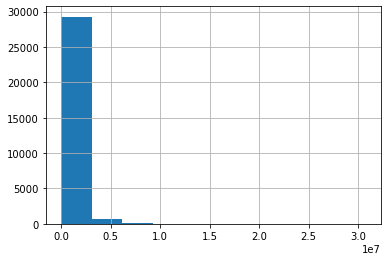

In [950]:
#checking skew of y value
y.hist();

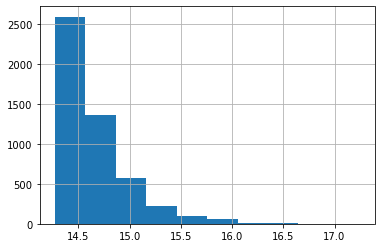

In [951]:
y_scld = np.log(y)
y_log.hist();

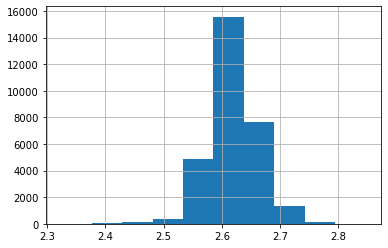

In [953]:
y_scld_2 = np.log(y_scld)
y_scld_2.hist();

In [955]:
##linear regression for top 5000 values with walk, bike score, and mortgage rates

model_1 = sm.OLS(y_scld, sm.add_constant(x)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     1673.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:54:20   Log-Likelihood:                -17748.
No. Observations:               30076   AIC:                         3.553e+04
Df Residuals:                   30061   BIC:                         3.565e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              16.8117      0.261     64.469      0.000      16.301      17.323
bedrooms           -0.0593      0.003    -17.027      0.000      -0.066      -0.052
bathrooms           0.1030      0.005     20.061      0.000       0.093       0.113
sqft_living         0.0002   1.16e-05     18.541      0.000       0.000       0.000
sqft_lot         5.177e-08   4.31e-08      1.200      0.230   -3.28e-08    1.36e-07
floors              0.0869      0.006     13.821      0.000       0.075       0.099
sqft_above          0.0001   1.19e-05     10.179      0.000    9.77e-05       0.000
sqft_basement    9.879e-05   8.72e-06     11.326      0.000    8.17e-05       0.000
sqft_garage     -1.424e-05   1.22e-05     -1.170      0.242   -3.81e-05    9.61e-06
sqft_patio          0.0002   1.14e-05     13.347      0.000       0.000       0.000
yr_built           -0.0024      0.000    -20.549      0.000      -0.003      -0.002
yr_renovated     2.196e-05   6.38e-06      3.439      0.001    9.44e-06    3.45e-05
lat                 0.0373      0.003     13.314      0.000       0.032       0.043
long                0.0101      0.001     14.434      0.000       0.009       0.011
mortgage_rate_3     0.0843      0.003     28.292      0.000       0.078       0.090
==============================================================================
Omnibus:                     7138.560   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69718.307
Skew:                          -0.863   Prob(JB):                         0.00
Kurtosis:                      10.256   Cond. No.                     6.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

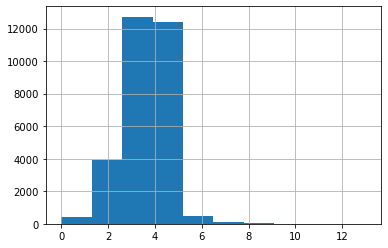

In [956]:
# log scalling is good for data that's right skewed
x['bedrooms'].hist();

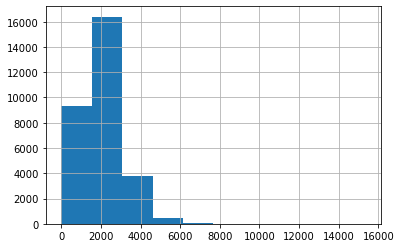

In [957]:
x['sqft_living'].hist();

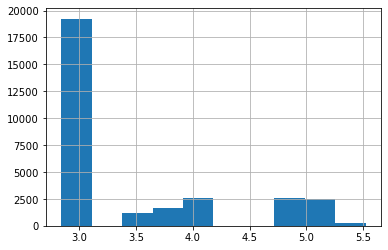

In [959]:
x['mortgage_rate_3'].hist();

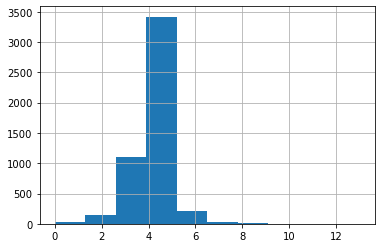

In [939]:
x['bedrooms'].hist();

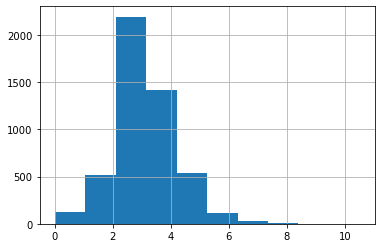

In [940]:
x['bathrooms'].hist();

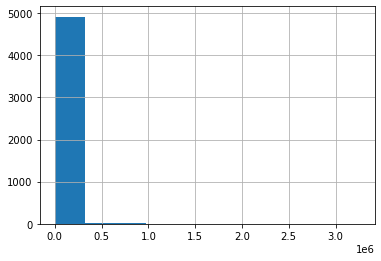

In [942]:
x['sqft_lot'].hist();

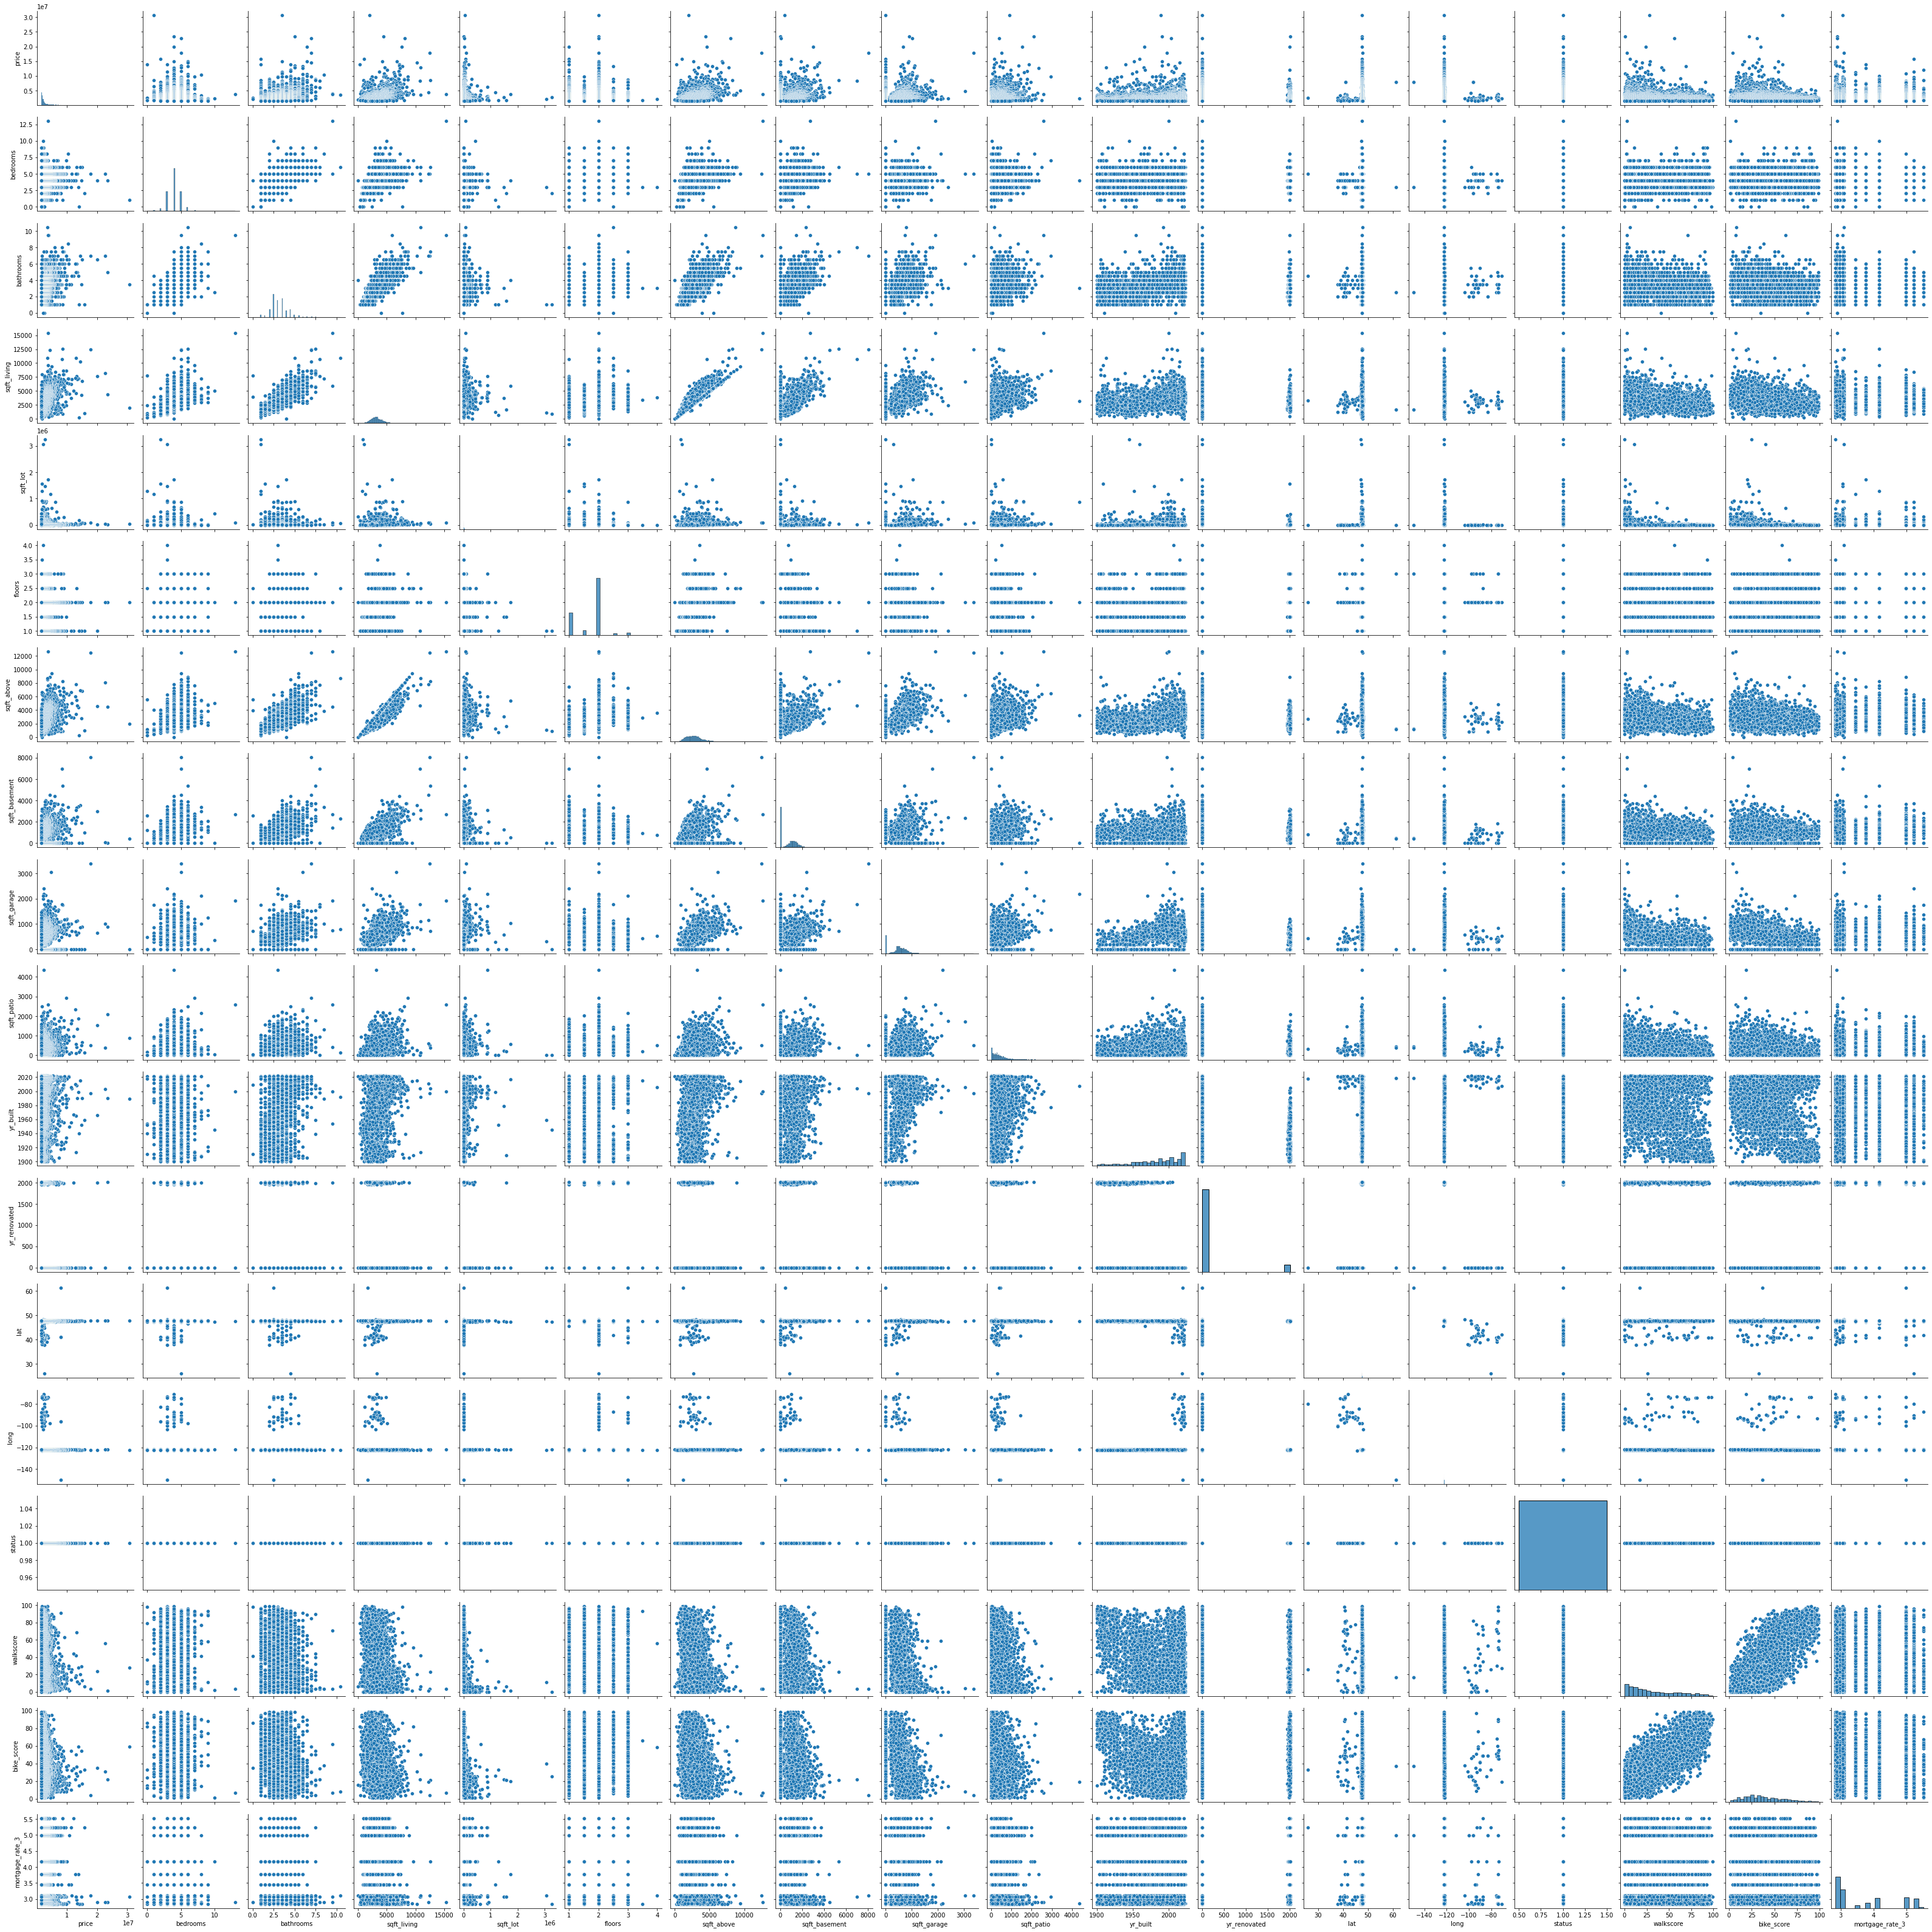

In [943]:
sns.pairplot(data=price_scores)

# Visualization

## Looking at cleaned dataframe with outliers

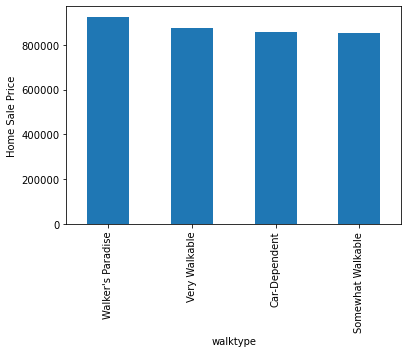

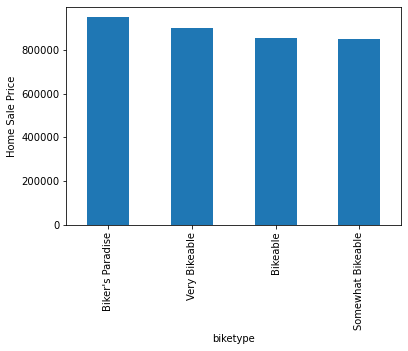

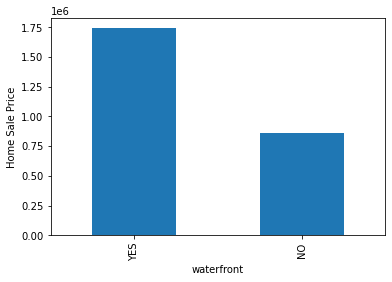

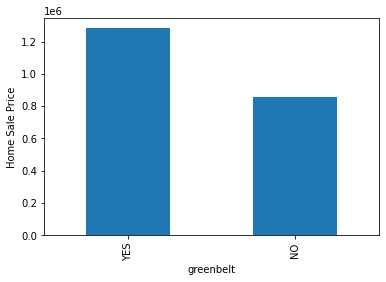

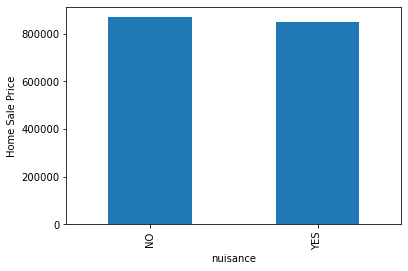

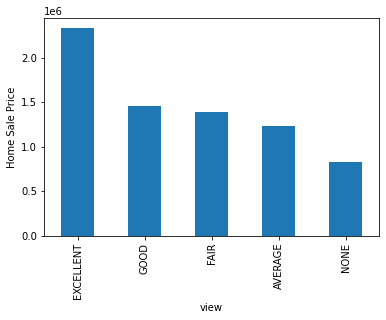

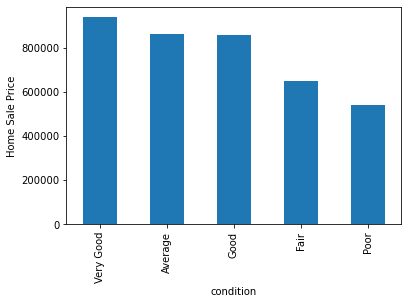

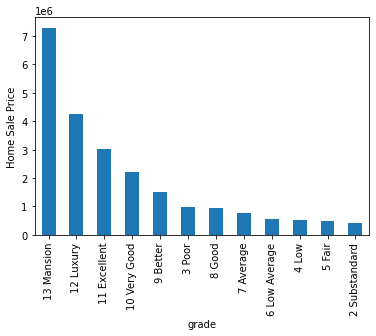

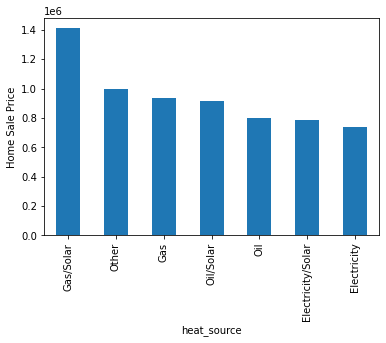

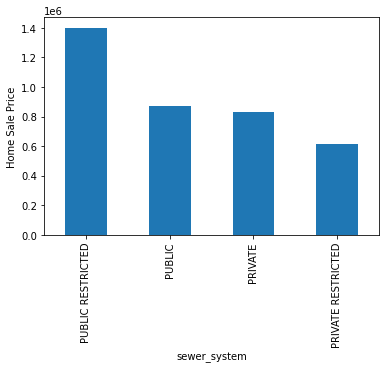

KeyboardInterrupt: 

In [2033]:
for feature in sample_hist:
    data= walkscore_mortgage.copy()
    data.groupby(feature)['price'].median().sort_values(ascending=False).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Home Sale Price')
    plt.show()

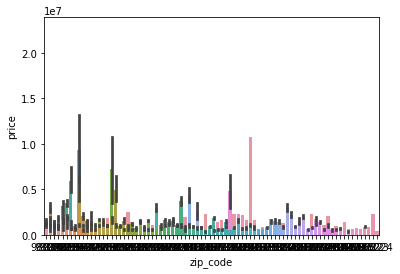

In [2036]:
sample_hist_2 = [feature walkscore_mortgage['']

for feature in sample_hist_2:
    data = walkscore_mortgage.copy()
    data.groupby(feature)['price'].median().sort_values(ascending=False)
    sns.barplot(data=data, x=feature, y="price")

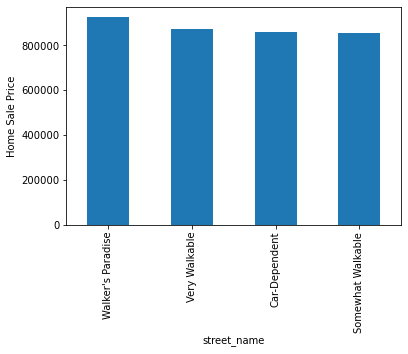

In [1710]:
data= walkscore_mortgage.copy()
data.groupby('walktype')['price'].median().sort_values(ascending=False).plot.bar()
plt.xlabel(feature)
plt.ylabel('Home Sale Price')
plt.show()

## Looking at cleaned dataframe without outliers

In [1899]:
##looking at outliers

y_4 = walkscore_mortgage['price']

#finding outliers using 1.5 IQR

Q1 = np.percentile(y_4, 25)

Q3 = np.percentile(y_4, 75)

#IQR formula
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR

upper_limit = Q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

-352625.0
2294375.0


In [1900]:
outlier_vis = walkscore_mortgage.drop(columns=["street_name", "city", 'bikescore',"heat_source", "sewer_system",
                                            "yr_renovated", "date","sqft_basement","state", ])

In [1901]:
outlier_vis = outlier_vis.loc[(outlier_vis['price'] > 0) & (outlier_vis['price'] < 2294375)]

In [1902]:
sample_hist_outlier = [feature for feature in outlier_vis.columns if outlier_vis[feature].dtypes=='O']
sample_hist_outlier

['walktype',
 'biketype',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'zip_code']

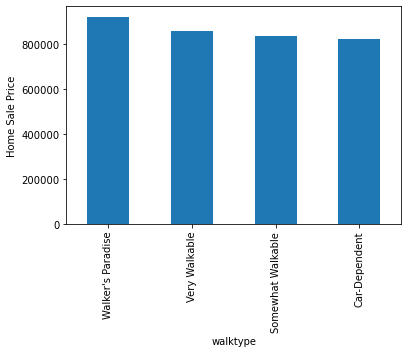

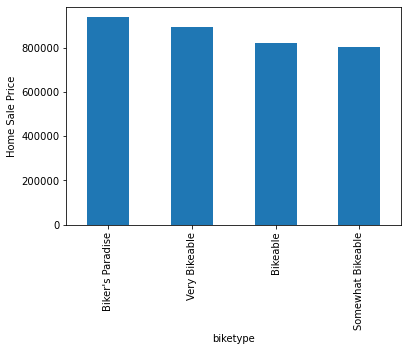

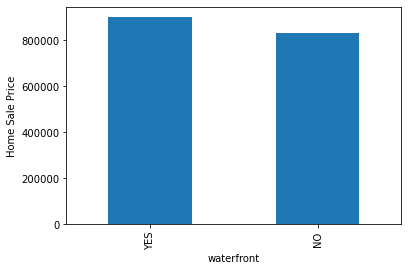

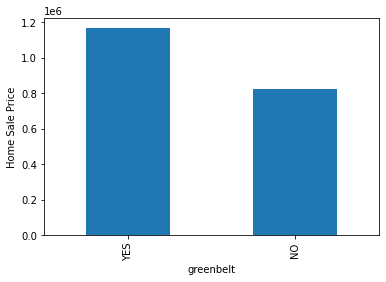

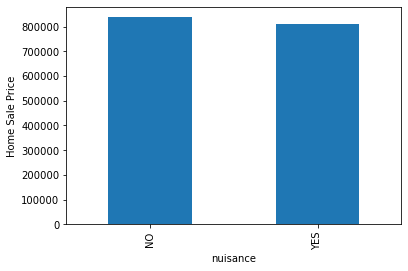

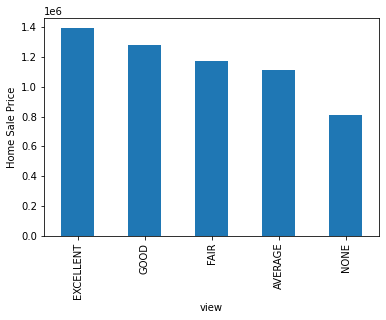

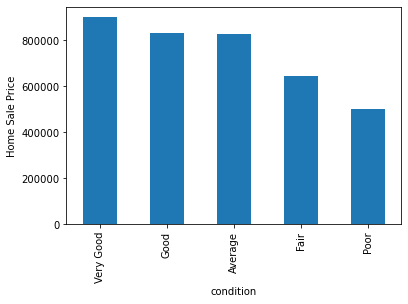

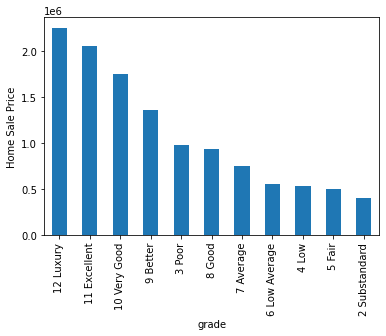

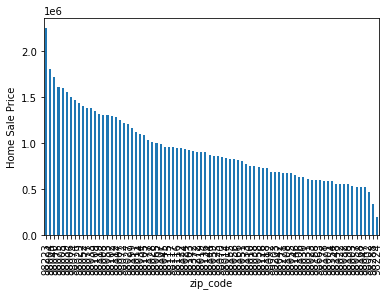

In [1903]:
for feature in sample_hist_outlier:
    data= outlier_vis.copy()
    data.groupby(feature)['price'].median().sort_values(ascending=False).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Home Sale Price')
    plt.show()

In [2182]:
walk_corr = model_dummies.corr()['price'].map(abs).sort_values(ascending=False).head(15)
walk_corr

price                  1.000000
sqft_living            0.570129
bathrooms              0.444822
grade_9 Better         0.342474
bedrooms               0.327664
grade_6 Low Average    0.268284
grade_7 Average        0.262568
sqft_patio             0.243312
sqft_garage            0.234461
view_NONE              0.206377
zip_code_98075         0.169403
zip_code_98006         0.166357
grade_8 Good           0.149132
zip_code_98052         0.148810
zip_code_98033         0.143546
Name: price, dtype: float64

In [2217]:
columns = ['sqft_living', 'bathrooms', 'grade_11 Excellent','bedrooms', 'zip_code_98004']
std_data = []

for x in columns:
    std = np.std(model_dummies[x])
    
    #appending data
    std.append(std_data)
    
    #making dataframe
    std_df = pd.DataFrame(data=std_data)

AttributeError: 'numpy.float64' object has no attribute 'append'

In [2250]:
columns = ['sqft_living', 'bathrooms', 'grade_11 Excellent','bedrooms', 'zip_code_98004']
std_list = []
coef_list = []
increase_factor_list = []
increase_percent_list = []

for x in columns:
    std = np.std(model_dummies[x])
    std_list.append(std)
    
    for x in columns:
        coef = updated_model.params.bathrooms
        coef_list.append(coef)
        
        for x in std_list:
            factor = round(np.exp(coef), 3)
            percent = round(np.exp(coef) - 1, 3)
            increase_factor_list.append(factor)
            increase_percent_list.append(percent)        

In [2263]:
columns = ['sqft_living', 'bathrooms', 'bedrooms', ]
std_list = []
coef_list = []
increase_factor_list = []
increase_percent_list = []

for x in columns:
    std = np.std(model_dummies[x])
    std_list.append(std)
        
    for x in std_list:
        factor = round(np.exp(x), 3)
        percent = round(np.exp(x) - 1, 3)
        increase_factor_list.append(factor)
        increase_percent_list.append(percent)
        
        #making DataFrame
        std_df = pd.DataFrame(std_list)
        increase_factor_df = pd.DataFrame(increase_factor_list)
        increase_percent_df = pd.DataFrame(increase_percent_list)
        
        #joining datafraes
        corr_df = pd.concat([std_df, increase_factor_df, increase_percent_df], axis=1)

In [2265]:
corr_df

,0,0,0
0,802.540550,inf,inf
1,0.806162,inf,inf
2,0.064582,2.239,1.239
3,0.943608,inf,inf
4,0.064582,2.239,1.239
5,NaN,1.067,0.067
6,NaN,inf,inf
7,NaN,2.239,1.239
8,NaN,1.067,0.067
9,NaN,2.569,1.569


In [2238]:
std_list

[802.5405502566913,
 0.8061619414941739,
 0.06458189186290299,
 0.9436075382576008,
 0.06458189186290299]

In [2253]:
increase_factor_list

[inf,
 inf,
 2.239,
 inf,
 2.239,
 1.067,
 inf,
 2.239,
 1.067,
 2.569,
 inf,
 2.239,
 1.067,
 2.569,
 1.067]

In [2254]:
increase_percent_list

[inf,
 inf,
 1.239,
 inf,
 1.239,
 0.067,
 inf,
 1.239,
 0.067,
 1.569,
 inf,
 1.239,
 0.067,
 1.569,
 0.067]

In [2219]:
columns = ['sqft_living', 'bathrooms', 'grade_11 Excellent','bedrooms', 'zip_code_98004']
coef_list = []

for x in columns:
    coef = model_dummies.params.x
    coef_list.append(coef)
    
for x in std_data:
    factor = round(np.exp(coef), 3)
    percent = round(np.exp(0.0220) - 1, 3)
    
    print(f" The coefficient of {x} is {std}")
    
    print(f""" A one-unit increase in the depth variable corresponds
to an increase in price by a factor of {factor},
or {percent}%.""")

AttributeError: 'DataFrame' object has no attribute 'params'

In [2227]:
columns = ['sqft_living', 'bathrooms', 'grade_11 Excellent','bedrooms', 'zip_code_98004']

for x in columns:
    coef = model_dummies.params.x


AttributeError: 'DataFrame' object has no attribute 'params'

In [2221]:
columns = ['sqft_living', 'bathrooms', 'grade_11 Excellent','bedrooms', 'zip_code_98004']
coef_list = []

for x in columns:
    coef = model_dummies.params.x

AttributeError: 'DataFrame' object has no attribute 'params'

In [2231]:
updated_model.params.sqft_living

0.14223267111898907

In [2214]:
coef_params = updated_model.params.sort_values(ascending=False)
coef_params = pd.DataFrame(data=coef_params)

In [2215]:
coef_params

,0
const,13.645379
sqft_living,0.142233
zip_code_98117,0.109145
zip_code_98115,0.107195
zip_code_98103,0.104347
...,...
yr_built,-0.026191
grade_5 Fair,-0.038543
grade_8 Good,-0.042476
grade_6 Low Average,-0.086052


In [ ]:
columns = ['sqft_living', 'bathrooms', 'grade_11 Excellent','bedrooms', 'zip_code_98004']


for x in columns:
    factor = round(np.exp(coef), 3)

print(f""" A one-unit increase in the depth variable corresponds
to an increase in price by a factor of {round(np.exp(0.0220), 3)},
or {100 * round(np.exp(0.0220) - 1, 3)}%.""")